<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет! Меня зовут Никита Бережнов, и я буду проверять твой проект. Спасибо за проделанную работу! Предлагаю общаться на «ты». Моя основная цель поделиться своим опытом и помочь тебе стать профессионалом в IT сфере.</font>

<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Все отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Комментарий ревьюера: </b> Сделано все правильно, однако есть рекомендации, на что стоит обратить внимание
</div>

<div class="alert alert-block alert-danger">
<b>❌ Комментарий ревьюера: </b> Есть недочеты, без их отработки проект не будет принят
</div>

---

<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

<font color='blue'>Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:</font>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Отличная работа. Удачно подобраны визуализации. Использованы различные модели машинного обучения и проведено их сравнение. Увидел выводы к каждому этапу работы. Но есть маленькие недочёты. Их нужно исправить. 
Осталось совсем чуть-чуть. Всегда готов ответить на твои вопросы.
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> Спасибо за интерес к проекту. Принято. Желаю дальнейших успехов в учёбе и на работе
</div>

# Проект: Отток клиентов
## Описание проекта
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Нужно проверить F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

## План проекта
1. Загрузить и подготовить данные. Пояснить порядок действий.
2. Исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.
3. Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую. Кратко описать выводы.
4. Провести финальное тестирование.

## Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

## Целевой признак
* Exited — факт ухода клиента

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Хорошее введение. Понятна цель работы
</div>

## 1. Загрузить и подготовить данные. Пояснить порядок действий.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import random

try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
    
data[:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Предподготовка данных
**Можно сразу привести все названия столбцов к нижнему регистру**

In [2]:
data.columns = [x.lower() for x in data.columns]
data[:5]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Видим, что единственным признаком с NaN-значениями является `tenure`. Пропуски занимают 9%, и удалять такое количество строк не хорошая затея.**

**`tenure` принимает значения от 0 до 10 => заполним пропуски рандомными значениями от 0 до 10**

In [5]:
data[pd.isna(data['tenure'])==True]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
data['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
data = data.applymap(lambda l: l if not pd.isna(l) else random.randint(0, 11))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div class="alert alert-block alert-warning">
<b>⚠️ Комментарий ревьюера: </b>  Хорошо, но я бы заменил рандомом, так как непонятна природа самих пропусков. Кидаю статью про минусы и плюсы заполнения пропусков твоим подходом:

https://loginom.ru/blog/missing
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо!
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> 👍
</div>

**Заметим также по признакам, что есть некоторые из них (`rownumber, customerid, surname`), которые точно не влияют на решение клиента отказаться от услуг банка. Поэтому удалим данные признаки**

In [8]:
data = data.drop(['rownumber','customerid','surname'], axis=1)
data

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Да, можно удалить. Проверить корректность удаления можно с помощью корреляционного анализа
</div>

### Подготовка признаков к обучению.
Итак, в данном проекте стоит задача классификации.

Обратим внимание на то, что у нас 2 категориальных признака: `geography` и `gender`. Последний, очевидно, принимает два значения: Female и Male. Признак `geography` принимает 3 значения: France, Spain, Germany. 

In [9]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Признаки можно преобразовать, используя дамми-переменные, при этом исключив дамми-ловушку путем удаления по одному из столбцов у каждого преобразованного признака.

**Преобразовать категориальные признаки поможет прямое кодирование (OHE).**

In [10]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


**На данном этапе можно провести разделение данных на выборки по data_ohe:**

In [11]:
# выделим признаки и  целевой признак
target_ohe = data_ohe['exited']
features_ohe = data_ohe.drop('exited', axis=1)

# разделим данные на обучающую, валидационную и тестируемую выборки:
# сначала выделим обучающую, затем valid и test
features_train_ohe, features_valid_test_ohe, target_train_ohe, target_valid_test_ohe = train_test_split(features_ohe, target_ohe, test_size=0.4, random_state=100)
features_valid_ohe, features_test_ohe, target_valid_ohe, target_test_ohe = train_test_split(features_valid_test_ohe, target_valid_test_ohe, test_size=0.5, random_state=100)

**Заметим также, что у признаков разный масштаб - следует их стандартизировать**

In [12]:
pd.options.mode.chained_assignment = None

numeric = ['creditscore','age','tenure','balance','estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])

features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_valid_ohe[numeric] = scaler.transform(features_valid_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

features_test_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
1666,-0.406870,0.678427,-0.005286,-1.232120,1,1,0,-0.394545,0,0,0
8055,0.073541,0.203427,1.006834,0.524779,1,1,1,-0.590870,0,1,1
2739,-0.260658,0.583427,0.669461,0.976896,1,0,0,0.427107,0,0,1
570,-0.511307,0.488427,-0.342659,0.381597,2,1,1,-0.657139,0,0,1
8349,0.553952,0.013427,-1.354778,1.041197,1,1,1,-1.207260,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,-0.406870,0.203427,-1.017405,0.601938,1,1,0,1.117860,1,0,0
6529,1.942966,-0.176573,0.332088,-1.232120,2,1,0,0.194545,0,1,0
5227,0.533065,-1.506573,-0.680032,-1.232120,2,1,0,-1.072389,0,0,1
6356,-0.030896,0.393427,1.344207,-1.232120,2,1,1,-0.380342,0,0,1


<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера️:</b> Да, так. Правильно, что fit только на трейне. pd.options.mode.chained_assignment = None предлагаю вынести в самый верх, чтобы убрать warning
</div>

**Теперь исходные данные готовы к первому обучению**

## 2. Исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.

**Проверим целевой признак на баланс:**

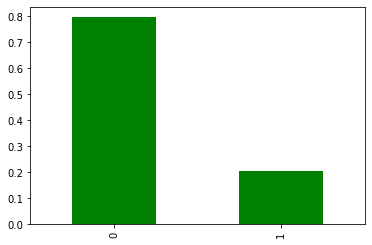

In [13]:
data['exited'].value_counts(normalize=True).plot(kind='bar', color='green');

<div class="alert alert-block alert-warning">
<b>⚠️ Комментарий ревьюера: </b>
Для того, чтобы не показывать вспомогательные выводы python типа AxesSubplot:, можно в конце строки добавить точку с запятой или plt.show()
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Круто, спасибо!
</div>

**80% принимают значение 0 и 20% принимают значение 1. Данные несбалансированные**

**Тем не менее попробуем обучить модель без учета дисбаланса классов**

### LogisticRegression


In [14]:
lr_model = LogisticRegression(random_state=100, solver='liblinear')
lr_model.fit(features_train_ohe,target_train_ohe)
lr_predictions = lr_model.predict(features_valid_ohe)
print('accuracy_score', accuracy_score(target_valid_ohe, lr_predictions))
print('precision_score',precision_score(target_valid_ohe, lr_predictions))
print('recall_score', recall_score(target_valid_ohe, lr_predictions))
print('f1_score', f1_score(target_valid_ohe, lr_predictions))

# сравним метрику accuracy с константной моделью:
pred_constant = pd.Series([0]*len(target_valid_ohe))
print('--------------------')
print('const accuracy_score', accuracy_score(target_valid_ohe, pred_constant))

accuracy_score 0.818
precision_score 0.6106870229007634
recall_score 0.2035623409669211
f1_score 0.3053435114503817
--------------------
const accuracy_score 0.8035


### DecisionTreeClassifier

In [15]:
# тренируем на обучающей выборке
# предсказываем на валидационной и с помощью цикла выявим max_depth 

dt_best_model = None
dt_best_f1 = 0
dt_best_max_depth = 0

for depth in range(2, 10):
    dt_model = DecisionTreeClassifier(max_depth=depth,random_state=100)
    dt_model.fit(features_train_ohe,target_train_ohe)
    dt_predictions = dt_model.predict(features_valid_ohe)
    dt_accuracy = accuracy_score(target_valid_ohe, dt_predictions)
    dt_precision = precision_score(target_valid_ohe, dt_predictions)
    dt_recall = recall_score(target_valid_ohe, dt_predictions)
    dt_f1 = f1_score(target_valid_ohe, dt_predictions)
    print("max_depth =", depth, ": ", end='==> ')
    print('accuracy =',dt_accuracy, '; precision =', dt_precision, '; recall =', dt_recall, '; f1 =', dt_f1)
    if dt_f1 > dt_best_f1:
        dt_best_model = dt_model
        dt_best_f1 = dt_f1
        dt_best_max_depth = depth
        
print('-------------------------------------------------')
print("F1 наилучшей модели на валидационной выборке:", dt_best_f1)
print('Max_depth: ', dt_best_max_depth)

max_depth = 2 : ==> accuracy = 0.8465 ; precision = 0.6706349206349206 ; recall = 0.4300254452926209 ; f1 = 0.5240310077519379
max_depth = 3 : ==> accuracy = 0.8515 ; precision = 0.6804511278195489 ; recall = 0.46055979643765904 ; f1 = 0.5493171471927162
max_depth = 4 : ==> accuracy = 0.863 ; precision = 0.8051282051282052 ; recall = 0.3994910941475827 ; f1 = 0.5340136054421769
max_depth = 5 : ==> accuracy = 0.8655 ; precision = 0.7792792792792793 ; recall = 0.4402035623409669 ; f1 = 0.5626016260162602
max_depth = 6 : ==> accuracy = 0.8625 ; precision = 0.8072916666666666 ; recall = 0.3944020356234097 ; f1 = 0.5299145299145299
max_depth = 7 : ==> accuracy = 0.8625 ; precision = 0.7234848484848485 ; recall = 0.4860050890585242 ; f1 = 0.5814307458143074
max_depth = 8 : ==> accuracy = 0.8565 ; precision = 0.7137096774193549 ; recall = 0.45038167938931295 ; f1 = 0.5522620904836193
max_depth = 9 : ==> accuracy = 0.852 ; precision = 0.6872586872586872 ; recall = 0.4529262086513995 ; f1 = 0.5

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Отлично. Перебор параметров лучше осуществлять через GridSearchCV в библиотеке sklearn.

https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv
</div>

### RandomForestClassifier


In [16]:
# тренируем на обучающей выборке
# считаем качество модели на валидационной выборке 
# и с помощью цикла выявим оптимальное количество деревьев и глубину дерева

rf_best_model = None
rf_best_f1 = 0
rf_best_est = 0
rf_max_depth = 0

for est in range(100, 800, 100):
    for depth in range(2,8):
        rf_model = RandomForestClassifier(random_state=100, n_estimators=est, max_depth=depth)
        rf_model.fit(features_train_ohe,target_train_ohe) 
        rf_predictions = rf_model.predict(features_valid_ohe)
        rf_accuracy = accuracy_score(target_valid_ohe, rf_predictions)
        rf_precision = precision_score(target_valid_ohe, rf_predictions)
        rf_recall = recall_score(target_valid_ohe, rf_predictions)
        rf_f1 = f1_score(target_valid_ohe, rf_predictions)
        print('n_estimators = {:.0f} ==> accuracy = {:.3f}; precision = {:.3f}; recall = {:.3f}; f1 = {:.3f}'.format(est,rf_accuracy,rf_precision,rf_recall,rf_f1))
        if rf_f1 > rf_best_f1:
            rf_best_model = rf_model 
            rf_best_f1 = rf_f1
            rf_best_est = est
            rf_max_depth = depth
print('-------------------------------------------------')
print("F1 наилучшей модели на валидационной выборке:", rf_best_f1)
print('Количество деревьев = ', rf_best_est)
print('Глубина деревьев: ', rf_max_depth)

n_estimators = 100 ==> accuracy = 0.822; precision = 0.950; recall = 0.097; f1 = 0.176
n_estimators = 100 ==> accuracy = 0.827; precision = 0.859; recall = 0.140; f1 = 0.241
n_estimators = 100 ==> accuracy = 0.845; precision = 0.842; recall = 0.257; f1 = 0.394
n_estimators = 100 ==> accuracy = 0.861; precision = 0.824; recall = 0.369; f1 = 0.510
n_estimators = 100 ==> accuracy = 0.864; precision = 0.834; recall = 0.384; f1 = 0.526
n_estimators = 100 ==> accuracy = 0.868; precision = 0.818; recall = 0.422; f1 = 0.557
n_estimators = 200 ==> accuracy = 0.819; precision = 0.970; recall = 0.081; f1 = 0.150
n_estimators = 200 ==> accuracy = 0.828; precision = 0.900; recall = 0.137; f1 = 0.238
n_estimators = 200 ==> accuracy = 0.844; precision = 0.840; recall = 0.254; f1 = 0.391
n_estimators = 200 ==> accuracy = 0.859; precision = 0.836; recall = 0.351; f1 = 0.495
n_estimators = 200 ==> accuracy = 0.865; precision = 0.840; recall = 0.387; f1 = 0.530
n_estimators = 200 ==> accuracy = 0.867; pr

**Вывод:** Лучшие F1 у RandomForestClassifier и DecisionTreeClassifier близки, в то время как у LogisticRegression F1 очень низкий. При этом требуемого значения метрики F1 = 0.59 достичь не удалось. Следовательно модели следует улучшить.

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера️:</b> Правильно, что делаешь вывод
</div>

## 3. Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую. Кратко описать выводы.

### LogisticRegression

1. Решим проблему дисбаланса через **Взвешивание классов** и обучим модели вновь

In [17]:
lr_model1 = LogisticRegression(random_state=100, solver='liblinear',class_weight='balanced')
lr_model1.fit(features_train_ohe,target_train_ohe)
lr_predictions1 = lr_model1.predict(features_valid_ohe)
print('accuracy_score', accuracy_score(target_valid_ohe, lr_predictions1))
print('precision_score',precision_score(target_valid_ohe, lr_predictions1))
print('recall_score', recall_score(target_valid_ohe, lr_predictions1))
print('f1_score', f1_score(target_valid_ohe, lr_predictions1))

# сравним метриками качества предыдущей модели (без учета дисбаланса):
print('---------предыдущие значения---------')
print('accuracy_score', accuracy_score(target_valid_ohe, lr_predictions))
print('precision_score',precision_score(target_valid_ohe, lr_predictions))
print('recall_score', recall_score(target_valid_ohe, lr_predictions))
print('f1_score', f1_score(target_valid_ohe, lr_predictions))

accuracy_score 0.725
precision_score 0.39261285909712723
recall_score 0.7302798982188295
f1_score 0.5106761565836299
---------предыдущие значения---------
accuracy_score 0.818
precision_score 0.6106870229007634
recall_score 0.2035623409669211
f1_score 0.3053435114503817


F1 модели явно улучшилось, но этого не достаточно. 

2. Попробуем улучшить качество модели через **увеличение выборки**

In [18]:
# функция upsample()
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=100)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train_ohe, target_train_ohe, 4)

lr_model2 = LogisticRegression(solver='liblinear', random_state=100)
lr_model2.fit(features_upsampled, target_upsampled)
lr_predictions2 = lr_model2.predict(features_valid_ohe)

if f1_score(target_valid_ohe, lr_predictions2) >= 0.59:
    print("F1:", f1_score(target_valid_ohe, lr_predictions2), 'требуемое значение f1 достигнуто')
else:
    print("F1:", f1_score(target_valid_ohe, lr_predictions2), 'требуемое значение f1 НЕ достигнуто')

F1: 0.5097001763668431 требуемое значение f1 НЕ достигнуто


Не помогло.

3. Теперь попробуем перебрать **порог классификации**, взяв за основу lr_model1 с **взвешенными классами**

In [20]:
lr_probabilities_valid = lr_model1.predict_proba(features_valid_ohe)
lr_probabilities_one_valid = lr_probabilities_valid[:, 1]
lr_best_f1 = 0
lr_best_threshold = 0
for threshold in np.arange(0.3, 0.8, 0.02):
    lr_predictions3 = lr_probabilities_one_valid > threshold 
    lr_precision3 = precision_score(target_valid_ohe,lr_predictions3)
    lr_recall3 = recall_score(target_valid_ohe,lr_predictions3)
    lr_f1_3 = f1_score(target_valid_ohe,lr_predictions3)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(threshold, lr_precision3, lr_recall3, lr_f1_3))
    if lr_f1_3 > lr_best_f1:
        lr_best_f1 = lr_f1_3
        lr_best_threshold = threshold

print('---------------------лучшие значения----------------------')
if lr_best_f1 >= 0.59:
    print('Порог = {:.2f}, best F1 = {:.3f} => требуемое значение f1 достигнуто'.format(lr_best_threshold, lr_best_f1))
else:
    print('Порог = {:.2f}, best F1 = {:.3f} => требуемое значение f1 НЕ достигнуто'.format(lr_best_threshold, lr_best_f1))
print('--------------значение с порогом по умолчанию--------------')
print('F1 = {:.3f}'.format(f1_score(target_valid_ohe, lr_predictions1)))

Порог = 0.30 | Точность = 0.272, Полнота = 0.929, F1 = 0.421
Порог = 0.32 | Точность = 0.279, Полнота = 0.911, F1 = 0.428
Порог = 0.34 | Точность = 0.290, Полнота = 0.896, F1 = 0.439
Порог = 0.36 | Точность = 0.299, Полнота = 0.878, F1 = 0.446
Порог = 0.38 | Точность = 0.310, Полнота = 0.858, F1 = 0.455
Порог = 0.40 | Точность = 0.326, Полнота = 0.845, F1 = 0.471
Порог = 0.42 | Точность = 0.340, Полнота = 0.840, F1 = 0.484
Порог = 0.44 | Точность = 0.351, Полнота = 0.822, F1 = 0.492
Порог = 0.46 | Точность = 0.366, Полнота = 0.794, F1 = 0.501
Порог = 0.48 | Точность = 0.379, Полнота = 0.758, F1 = 0.506
Порог = 0.50 | Точность = 0.393, Полнота = 0.730, F1 = 0.511
Порог = 0.52 | Точность = 0.403, Полнота = 0.700, F1 = 0.511
Порог = 0.54 | Точность = 0.412, Полнота = 0.669, F1 = 0.510
Порог = 0.56 | Точность = 0.427, Полнота = 0.628, F1 = 0.509
Порог = 0.58 | Точность = 0.446, Полнота = 0.598, F1 = 0.511
Порог = 0.60 | Точность = 0.452, Полнота = 0.567, F1 = 0.503
Порог = 0.62 | Точность 

**Наилучшее значение F1 у Логистической регрессии = 0.511 => значение в 0,59 не достигнуто**

Посмотрим, как сильно наилучшая модель отличается от случайной + посчитаем площадь под ROC-кривой — **AUC-ROC** 

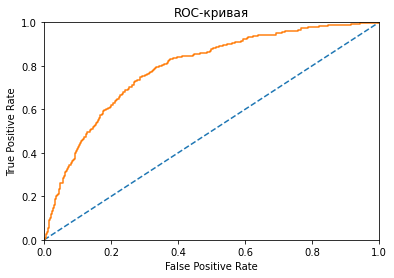

0.7885048080044209


In [21]:
fpr, tpr, thresholds = roc_curve(target_valid_ohe, lr_probabilities_one_valid)

plt.figure()
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC-кривая по модели
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
lr_auc_roc = roc_auc_score(target_valid_ohe, lr_probabilities_one_valid)
print(lr_auc_roc)

**Модель далека от случайной модели, но и далека от идеала, о чем можно посудить по площади под кривой**

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера️:</b> Да, согласен
</div>

### DecisionTreeClassifier


**Порядок действий такой же, как и с Logisitic regression:**

1. Попытка улучшить модель с помощью взвешенных классов

In [22]:
dt_best_model1 = None
dt_best_f11 = 0
dt_best_max_depth1 = 0

for depth in range(1, 10):
    dt_model1 = DecisionTreeClassifier(max_depth=depth,random_state=100, class_weight='balanced')
    dt_model1.fit(features_train_ohe,target_train_ohe)
    dt_predictions1 = dt_model1.predict(features_valid_ohe)
    dt_accuracy1 = accuracy_score(target_valid_ohe, dt_predictions1)
    dt_precision1 = precision_score(target_valid_ohe, dt_predictions1)
    dt_recall1 = recall_score(target_valid_ohe, dt_predictions1)
    dt_f11 = f1_score(target_valid_ohe, dt_predictions1)
    print("max_depth =", depth, ": ", end='==> ')
    print('accuracy =',dt_accuracy1, '; precision =', dt_precision1, '; recall =', dt_recall1, '; f1 =', dt_f11)
    if dt_f11 > dt_best_f11:
        dt_best_model1 = dt_model1
        dt_best_f11 = dt_f11
        dt_best_max_depth1 = depth
        
print('-------------------------------------------------')
print("F1 наилучшей модели на валидационной выборке:", dt_best_f11)
print('Max_depth: ', dt_best_max_depth1)
print('----------сравнение с моделью без учета дибаланса----------')
print("F1 наилучшей модели на валидационной выборке:", dt_best_f1)
print('Max_depth: ', dt_best_max_depth)

max_depth = 1 : ==> accuracy = 0.732 ; precision = 0.3866877971473851 ; recall = 0.6208651399491094 ; f1 = 0.47656249999999994
max_depth = 2 : ==> accuracy = 0.735 ; precision = 0.3960546282245827 ; recall = 0.6641221374045801 ; f1 = 0.4961977186311787
max_depth = 3 : ==> accuracy = 0.735 ; precision = 0.3960546282245827 ; recall = 0.6641221374045801 ; f1 = 0.4961977186311787
max_depth = 4 : ==> accuracy = 0.762 ; precision = 0.43888070692194403 ; recall = 0.7582697201017812 ; f1 = 0.5559701492537313
max_depth = 5 : ==> accuracy = 0.752 ; precision = 0.4289655172413793 ; recall = 0.7913486005089059 ; f1 = 0.556350626118068
max_depth = 6 : ==> accuracy = 0.7695 ; precision = 0.44925373134328356 ; recall = 0.7659033078880407 ; f1 = 0.5663217309501412
max_depth = 7 : ==> accuracy = 0.7745 ; precision = 0.45396825396825397 ; recall = 0.727735368956743 ; f1 = 0.5591397849462365
max_depth = 8 : ==> accuracy = 0.815 ; precision = 0.5234215885947047 ; recall = 0.6539440203562341 ; f1 = 0.58144

2. Попытка улучшить модель с помощью увеличения выборки

In [23]:
dt_best_model2 = None
dt_best_f12 = 0
dt_best_max_depth2 = 0

for depth in range(1, 10):
    dt_model2 = DecisionTreeClassifier(max_depth=depth,random_state=100)
    dt_model2.fit(features_upsampled, target_upsampled)
    dt_predictions2 = dt_model2.predict(features_valid_ohe)
    dt_accuracy2 = accuracy_score(target_valid_ohe, dt_predictions2)
    dt_precision2 = precision_score(target_valid_ohe, dt_predictions2)
    dt_recall2 = recall_score(target_valid_ohe, dt_predictions2)
    dt_f12 = f1_score(target_valid_ohe, dt_predictions2)
    print("max_depth =", depth, ": ", end='==> ')
    print('accuracy =',dt_accuracy2, '; precision =', dt_precision2, '; recall =', dt_recall2, '; f1 =', dt_f12)
    if dt_f12 > dt_best_f12:
        dt_best_model2 = dt_model2
        dt_best_f12 = dt_f12
        dt_best_max_depth2 = depth
        
print('-------------------------------------------------')
print("F1 наилучшей модели на валидационной выборке:", dt_best_f12)
print('Max_depth: ', dt_best_max_depth2)

max_depth = 1 : ==> accuracy = 0.732 ; precision = 0.3866877971473851 ; recall = 0.6208651399491094 ; f1 = 0.47656249999999994
max_depth = 2 : ==> accuracy = 0.735 ; precision = 0.3960546282245827 ; recall = 0.6641221374045801 ; f1 = 0.4961977186311787
max_depth = 3 : ==> accuracy = 0.735 ; precision = 0.3960546282245827 ; recall = 0.6641221374045801 ; f1 = 0.4961977186311787
max_depth = 4 : ==> accuracy = 0.762 ; precision = 0.43888070692194403 ; recall = 0.7582697201017812 ; f1 = 0.5559701492537313
max_depth = 5 : ==> accuracy = 0.752 ; precision = 0.4289655172413793 ; recall = 0.7913486005089059 ; f1 = 0.556350626118068
max_depth = 6 : ==> accuracy = 0.769 ; precision = 0.4485842026825633 ; recall = 0.7659033078880407 ; f1 = 0.5657894736842105
max_depth = 7 : ==> accuracy = 0.772 ; precision = 0.4503937007874016 ; recall = 0.727735368956743 ; f1 = 0.556420233463035
max_depth = 8 : ==> accuracy = 0.818 ; precision = 0.5297741273100616 ; recall = 0.6564885496183206 ; f1 = 0.5863636363

3. Попытка улучшить модель с помощью изменения порога классфикации на основе модели (dt_model1) с взвешенными классами

In [24]:
dt_probabilities_valid = dt_best_model1.predict_proba(features_valid_ohe)
dt_probabilities_one_valid = dt_probabilities_valid[:, 1]
dt_best_f1_2 = 0
dt_best_threshold = 0
for threshold in np.arange(0.3, 0.8, 0.02):
    dt_predictions2 = dt_probabilities_one_valid > threshold 
    dt_precision2 = precision_score(target_valid_ohe,dt_predictions2)
    dt_recall2 = recall_score(target_valid_ohe,dt_predictions2)
    dt_f1_2 = f1_score(target_valid_ohe,dt_predictions2)
    print("Порог = {:.2f} | Точность = {:.4f}, Полнота = {:.4f}, F1 = {:.4f}".format(threshold, dt_precision2, dt_recall2, dt_f1_2))
    if dt_f1_2 > dt_best_f1_2:
        dt_best_f1_2 = dt_f1_2
        dt_best_threshold = threshold

print('---------------------лучшие значения----------------------')
if dt_best_f1_2 >= 0.59:
    print('Порог = {:.2f}, best F1 = {:.3f} => требуемое значение f1 достигнуто'.format(dt_best_threshold, dt_best_f1_2))
else:
    print('Порог = {:.2f}, best F1 = {:.3f} => требуемое значение f1 НЕ достигнуто'.format(dt_best_threshold, dt_best_f1_2))

Порог = 0.30 | Точность = 0.3498, Полнота = 0.8117, F1 = 0.4889
Порог = 0.32 | Точность = 0.3642, Полнота = 0.8117, F1 = 0.5028
Порог = 0.34 | Точность = 0.4249, Полнота = 0.7481, F1 = 0.5419
Порог = 0.36 | Точность = 0.4320, Полнота = 0.7430, F1 = 0.5463
Порог = 0.38 | Точность = 0.4458, Полнота = 0.7328, F1 = 0.5544
Порог = 0.40 | Точность = 0.4458, Полнота = 0.7328, F1 = 0.5544
Порог = 0.42 | Точность = 0.4451, Полнота = 0.7226, F1 = 0.5509
Порог = 0.44 | Точность = 0.4465, Полнота = 0.7226, F1 = 0.5520
Порог = 0.46 | Точность = 0.4512, Полнота = 0.7176, F1 = 0.5540
Порог = 0.48 | Точность = 0.4512, Полнота = 0.7176, F1 = 0.5540
Порог = 0.50 | Точность = 0.5234, Полнота = 0.6539, F1 = 0.5814
Порог = 0.52 | Точность = 0.5234, Полнота = 0.6539, F1 = 0.5814
Порог = 0.54 | Точность = 0.5312, Полнота = 0.6489, F1 = 0.5842
Порог = 0.56 | Точность = 0.5312, Полнота = 0.6489, F1 = 0.5842
Порог = 0.58 | Точность = 0.5336, Полнота = 0.6463, F1 = 0.5846
Порог = 0.60 | Точность = 0.5419, Полнот

**Получили нужное значение F1 на валидационной выборке. Используем эту модель в следующем этапе для финального тестирования**

**Построим также кривую ошибок, ROC-кривую и посчитаем площадь под кривой.** 

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера️:</b> Отлично, идём дальше.
</div>

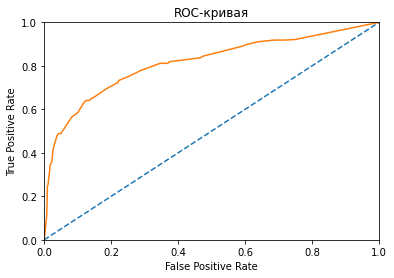

0.8141844443283283


In [25]:
fpr, tpr, thresholds = roc_curve(target_valid_ohe, dt_probabilities_one_valid)

plt.figure()
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC-кривая по модели
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
dt_auc_roc = roc_auc_score(target_valid_ohe, dt_probabilities_one_valid)
print(dt_auc_roc)

**Изменяя порог, мы получили возрастающие значения как истинно положительных, так и ложно положительных долей. Чем график выше, тем больше значение TPR и лучше качество модели. AUC-ROC случайной модели равна 0.5. Площадь под кривой лучшей из DecisionTreeClassifier равна 0.81, что тоже не идеально, но намного лучше случайной модели** 

### RandomForestClassifier

1. Попытка улучшить модель с помощью взвешенных классов

In [26]:
# тренируем на обучающей выборке
# считаем качество модели на валидационной выборке 
# и с помощью цикла выявим оптимальное количество деревьев и глубину дерева

rf_best_model1 = None
rf_best_f11 = 0
rf_best_est1 = 0
rf_max_depth1 = 0

for est in range(100, 800, 100):
    for depth in range(2,8):
        rf_model1 = RandomForestClassifier(random_state=100, n_estimators=est, max_depth=depth, class_weight='balanced')
        rf_model1.fit(features_train_ohe,target_train_ohe) 
        rf_predictions1 = rf_model1.predict(features_valid_ohe)
        rf_accuracy1 = accuracy_score(target_valid_ohe, rf_predictions1)
        rf_precision1 = precision_score(target_valid_ohe, rf_predictions1)
        rf_recall1 = recall_score(target_valid_ohe, rf_predictions1)
        rf_f11 = f1_score(target_valid_ohe, rf_predictions1)
        print('n_estimators =',est,'==> accuracy =',rf_accuracy1, '; precision =',rf_precision1,'; recall =',rf_recall1, '; f1 =',rf_f11)
        if rf_f11 > rf_best_f11:
            rf_best_model1 = rf_model1 
            rf_best_f11 = rf_f11
            rf_best_est1 = est
            rf_max_depth1 = depth
print('-------------------------------------------------')
print("F1 наилучшей модели на валидационной выборке:", rf_best_f11)
print('Количество деревьев = ', rf_best_est1)
print('Глубина деревьев: ', rf_max_depth1)

n_estimators = 100 ==> accuracy = 0.7615 ; precision = 0.4309210526315789 ; recall = 0.6666666666666666 ; f1 = 0.5234765234765234
n_estimators = 100 ==> accuracy = 0.779 ; precision = 0.45854483925549916 ; recall = 0.6895674300254453 ; f1 = 0.5508130081300813
n_estimators = 100 ==> accuracy = 0.7925 ; precision = 0.48035714285714287 ; recall = 0.6844783715012722 ; f1 = 0.5645330535152151
n_estimators = 100 ==> accuracy = 0.8045 ; precision = 0.5018450184501845 ; recall = 0.6921119592875318 ; f1 = 0.5818181818181818
n_estimators = 100 ==> accuracy = 0.8095 ; precision = 0.5112359550561798 ; recall = 0.6946564885496184 ; f1 = 0.5889967637540452
n_estimators = 100 ==> accuracy = 0.826 ; precision = 0.545271629778672 ; recall = 0.6895674300254453 ; f1 = 0.608988764044944
n_estimators = 200 ==> accuracy = 0.7615 ; precision = 0.43312101910828027 ; recall = 0.6921119592875318 ; f1 = 0.5328109696376103
n_estimators = 200 ==> accuracy = 0.783 ; precision = 0.4648370497427101 ; recall = 0.68956

2. Попытка улучшить модель с помощью увеличения выборки

In [27]:
rf_best_model2 = None
rf_best_f12 = 0
rf_best_est2 = 0
rf_max_depth2 = 0

for est in range(100, 800, 100):
    for depth in range(2,8):
        rf_model2 = RandomForestClassifier(random_state=100, n_estimators=est, max_depth=depth)
        rf_model2.fit(features_upsampled, target_upsampled)
        rf_predictions2 = rf_model2.predict(features_valid_ohe)
        rf_accuracy2 = accuracy_score(target_valid_ohe, rf_predictions2)
        rf_precision2 = precision_score(target_valid_ohe, rf_predictions2)
        rf_recall2 = recall_score(target_valid_ohe, rf_predictions2)
        rf_f12 = f1_score(target_valid_ohe, rf_predictions2)
        print("max_depth =", depth, ": ", end='==> ')
        print('n_estimators = {:.0f}, accuracy = {:.2f}, precision = {:.2f}, precision = {:.2f}, f1 = {:.2f}'.format(est,rf_accuracy2, rf_precision2,rf_recall2, rf_f12))
        if rf_f12 > rf_best_f12:
              rf_best_model2 = rf_model2 
              rf_best_f12 = rf_f12
              rf_best_est2 = est
              rf_max_depth2 = depth
print('-------------------------------------------------')
print("F1 наилучшей модели на валидационной выборке:", rf_best_f12)
print('Количество деревьев = ', rf_best_est2)
print('Глубина деревьев: ', rf_max_depth2)

max_depth = 2 : ==> n_estimators = 100, accuracy = 0.75, precision = 0.41, precision = 0.67, f1 = 0.51
max_depth = 3 : ==> n_estimators = 100, accuracy = 0.78, precision = 0.45, precision = 0.69, f1 = 0.55
max_depth = 4 : ==> n_estimators = 100, accuracy = 0.79, precision = 0.48, precision = 0.71, f1 = 0.58
max_depth = 5 : ==> n_estimators = 100, accuracy = 0.80, precision = 0.50, precision = 0.71, f1 = 0.59
max_depth = 6 : ==> n_estimators = 100, accuracy = 0.81, precision = 0.51, precision = 0.72, f1 = 0.59
max_depth = 7 : ==> n_estimators = 100, accuracy = 0.82, precision = 0.53, precision = 0.72, f1 = 0.61
max_depth = 2 : ==> n_estimators = 200, accuracy = 0.74, precision = 0.41, precision = 0.69, f1 = 0.52
max_depth = 3 : ==> n_estimators = 200, accuracy = 0.77, precision = 0.45, precision = 0.69, f1 = 0.54
max_depth = 4 : ==> n_estimators = 200, accuracy = 0.79, precision = 0.48, precision = 0.72, f1 = 0.57
max_depth = 5 : ==> n_estimators = 200, accuracy = 0.80, precision = 0.49

3. Попытка улучшить модель с помощью изменения порога классфикации на основе модели (rf_model1) с взвешенными классами

In [28]:
rf_probabilities_valid = rf_best_model1.predict_proba(features_valid_ohe)
rf_probabilities_one_valid = rf_probabilities_valid[:, 1]
rf_best_f1_2 = 0
rf_best_threshold = 0
for threshold in np.arange(0.3, 0.8, 0.02):
    rf_predictions2 = rf_probabilities_one_valid > threshold 
    rf_precision2 = precision_score(target_valid_ohe,rf_predictions2)
    rf_recall2 = recall_score(target_valid_ohe,rf_predictions2)
    rf_f1_2 = f1_score(target_valid_ohe,rf_predictions2)
    print("Порог = {:.2f} | Точность = {:.4f}, Полнота = {:.4f}, F1 = {:.4f}".format(threshold, rf_precision2, rf_recall2, rf_f1_2))
    if rf_f1_2 > rf_best_f1_2:
        rf_best_f1_2 = rf_f1_2
        rf_best_threshold = threshold

print('---------------------лучшие значения----------------------')
if rf_best_f1_2 >= 0.59:
    print('Порог = {:.2f}, best F1 = {:.3f} => требуемое значение f1 достигнуто'.format(rf_best_threshold, rf_best_f1_2))
else:
    print('Порог = {:.2f}, best F1 = {:.3f} => требуемое значение f1 НЕ достигнуто'.format(rf_best_threshold, rf_best_f1_2))

Порог = 0.30 | Точность = 0.3260, Полнота = 0.9059, F1 = 0.4795
Порог = 0.32 | Точность = 0.3507, Полнота = 0.8906, F1 = 0.5032
Порог = 0.34 | Точность = 0.3732, Полнота = 0.8728, F1 = 0.5229
Порог = 0.36 | Точность = 0.4021, Полнота = 0.8575, F1 = 0.5475
Порог = 0.38 | Точность = 0.4299, Полнота = 0.8346, F1 = 0.5675
Порог = 0.40 | Точность = 0.4437, Полнота = 0.8219, F1 = 0.5763
Порог = 0.42 | Точность = 0.4697, Полнота = 0.7888, F1 = 0.5888
Порог = 0.44 | Точность = 0.4959, Полнота = 0.7710, F1 = 0.6036
Порог = 0.46 | Точность = 0.5106, Полнота = 0.7379, F1 = 0.6035
Порог = 0.48 | Точность = 0.5304, Полнота = 0.7099, F1 = 0.6072
Порог = 0.50 | Точность = 0.5551, Полнота = 0.6794, F1 = 0.6110
Порог = 0.52 | Точность = 0.5778, Полнота = 0.6616, F1 = 0.6168
Порог = 0.54 | Точность = 0.5981, Полнота = 0.6285, F1 = 0.6129
Порог = 0.56 | Точность = 0.6364, Полнота = 0.6234, F1 = 0.6298
Порог = 0.58 | Точность = 0.6543, Полнота = 0.5827, F1 = 0.6164
Порог = 0.60 | Точность = 0.6779, Полнот

**Получили нужное значение F1 на валидационной выборке. Используем третье улучшение модели в следующем этапе для финального тестирования**

**ROC-curve по случайному лесу**

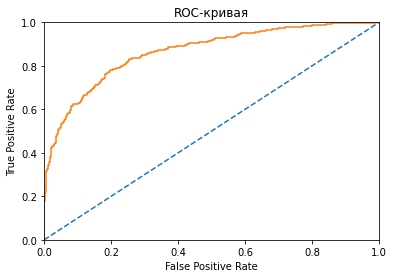

0.8650496951156755


In [29]:
fpr, tpr, thresholds = roc_curve(target_valid_ohe, rf_probabilities_one_valid)

plt.figure()
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC-кривая по модели
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
rf_auc_roc = roc_auc_score(target_valid_ohe, rf_probabilities_one_valid)
print(rf_auc_roc)

**Видим, что из всех ROC-кривых у "случайного леса" площадь под кривой наибольшая.**

## 4. Провести финальное тестирование.

### тестируем наилучшую Logistic regression модель на тестовой выборке:

In [30]:
# Best Lr model
display(lr_model1)
print('Порог классификации лучшей модели: {:.2f}'.format(lr_best_threshold))

LogisticRegression(class_weight='balanced', random_state=100,
                   solver='liblinear')

Порог классификации лучшей модели: 0.52


In [36]:
threshold = 0.52
lr_model_test = LogisticRegression(class_weight='balanced', random_state=100, solver='liblinear')
lr_model_test.fit(features_train_ohe,target_train_ohe)
predicted_proba = lr_model_test.predict_proba(features_test_ohe)
predicted = (predicted_proba[:,1] > threshold).astype('int')

f1 = f1_score(target_test_ohe, predicted)
f1

0.4986251145737855

### тестируем наилучшую Decision Tree Classifier модель на тестовой выборке:

In [32]:
# Best DT model
display(dt_best_model1)
print('Порог классификации лучшей модели: {:.2f}'.format(dt_best_threshold))

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=100)

Порог классификации лучшей модели: 0.66


In [37]:
threshold = 0.66
dt_model_test = DecisionTreeClassifier(max_depth=8,random_state=100, class_weight='balanced')
dt_model_test.fit(features_train_ohe,target_train_ohe)
predicted_proba = dt_model_test.predict_proba(features_test_ohe)
predicted = (predicted_proba[:,1] > threshold).astype('int')

f1 = f1_score(target_test_ohe, predicted)
f1

0.5871766029246344

### тестируем наилучшую Random Forest Classifier модель на тестовой выборке:

In [34]:
# Best RF model
display(rf_best_model1)
print('Порог классификации лучшей модели: {:.2f}'.format(rf_best_threshold))

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=400,
                       random_state=100)

Порог классификации лучшей модели: 0.56


In [35]:
threshold = 0.56
rf_model_test = RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=700, random_state=100)
rf_model_test.fit(features_train_ohe,target_train_ohe)
predicted_proba = rf_model_test.predict_proba(features_test_ohe)
predicted = (predicted_proba[:,1] > threshold).astype('int')

f1 = f1_score(target_test_ohe, predicted)
f1

0.6103286384976526

## Вывод
Задача проекта состояла в построении модели с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно было довести F1 до 0.59.

По итогу лучшие модели с точки зрения F1 те, что были сбалансированы и с измененным порогом классифкации, который был найден через цикл. 

* Наилучшей моделью после тестирования оказалась RandomForestClassifier с F1 = 0.610
* Также близкой к 0.59 оказалась DecisionTreeClassifier с F1 = 0.587
* LogisticRegression в свою очередь получила самое низкое значение метрики F1 = 0.500  

Приведем для сравнения значения AUC-ROC для каждой модели:
* RandomForestClassifier = 0.865
* DecisionTreeClassifier = 0.811
* LogisticRegression = 0.788

Видим, что значения AUC-ROC, которое является количественной интерпретацией ROC-кривой, расположены в той же иерархии, что и F1 моделей. 

В целом, обозначим, что ROC предназначен для различных уровней порогов классификации и, следовательно, помогает посмотреть на общую картину. Если говорить об F1, то он вычисляется при заданном пороге и позволяет оценить качество модели точечно.

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера️:</b> Круто. Спасибо за хороший подробный вывод!
</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Мне очень понравилась твоя работа. Спасибо тебе большое, за хорошее оформление проекта и выводы к каждому этапу работы.
Чувствуется уверенное знание материала и владение питоном в целом. 
</div>

</div>

<font color='blue'><b>Осталось совсем немного, буду ждать твою работу на повторное ревью 🙂</b></font>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> Спасибо за интерес к проекту. Принято. Желаю дальнейших успехов в учёбе и на работе
</div>